## Data Science Capstone Project One: Flight Cancellation Prediction

### 4. Pre-processing & Training Data Development
In this part of the project, we'll create dummy or indicator features for categorical variables,
standardize the magnitude of numeric features using a scaler, split the data into testing and training datasets. The ultimate purpose in this phase is to have a cleaned development dataset that we can use to complete the modeling step of the project.

### 4.1 Sourcing & Loading

#### 4.1.1 Import relevant libraries and packages


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split 

#### 4.1.2 Import & review data

In [25]:
df = pd.read_csv("flight_lax_eda.csv")

In [26]:
df.head(3)

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_STATE,AIRLINE
0,0,1,1,4,2336,PBI,10,280.0,2330,750,0,FL,American Airlines Inc.
1,1,1,1,4,258,MIA,20,285.0,2342,805,0,FL,American Airlines Inc.
2,2,1,1,4,2013,CLT,30,273.0,2125,803,0,NC,US Airways Inc.


In [27]:
# Let's get rid of the first column "Unnamed:0" and then check the size of the data.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
df.head(3)

(211388, 12)


,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_STATE,AIRLINE
0,1,1,4,2336,PBI,10,280.0,2330,750,0,FL,American Airlines Inc.
1,1,1,4,258,MIA,20,285.0,2342,805,0,FL,American Airlines Inc.
2,1,1,4,2013,CLT,30,273.0,2125,803,0,NC,US Airways Inc.


### 4.2 Pre-processing
#### 4.2.1 Categorical Variables
First of all, let's take a look at all the categorical variables (i.e. "DESTINATION_AIRPORT", "DESTIANTION_STATE" and "AIRLINE") and create dummy or indicator features for them.

##### 4.2.1a Label Code Airlines

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
airline = pd.read_csv("airline.csv")
airline.drop(['Unnamed: 0'], axis=1, inplace=True)
airline = airline.sort_values('%_CANCELLED').reset_index(drop=True)
airline

,AIRLINE,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
0,Delta Air Lines Inc.,27667,54,0.001952
1,Alaska Airlines Inc.,8934,25,0.002798
2,Hawaiian Airlines Inc.,1671,6,0.003591
3,Frontier Airlines Inc.,1522,6,0.003942
4,Virgin America,12877,76,0.005902
5,US Airways Inc.,3688,27,0.007321
6,JetBlue Airways,4465,35,0.007839
7,American Airlines Inc.,35831,333,0.009294
8,United Air Lines Inc.,29852,306,0.010251
9,Spirit Air Lines,4801,56,0.011664


We've sorted the airline dataframe by the %_CANCELLED column and re-indexed it.  We will now label encoding the AIRLINE column in df using the index number assigned in the airline file.  Since the airline file has already been sorted according to the %_CANCELLED values, the higher the index number, the higher chances of flight cancellation with that airline.


In [30]:
# Create a dictionary using AIRLINE as the key and index as the value.
airline_list = airline['AIRLINE'].values
airline_dict = {airline_list[i]: i for i in range(len(airline_list))}
airline_dict

{'Delta Air Lines Inc.': 0,
 'Alaska Airlines Inc.': 1,
 'Hawaiian Airlines Inc.': 2,
 'Frontier Airlines Inc.': 3,
 'Virgin America': 4,
 'US Airways Inc.': 5,
 'JetBlue Airways': 6,
 'American Airlines Inc.': 7,
 'United Air Lines Inc.': 8,
 'Spirit Air Lines': 9,
 'Skywest Airlines Inc.': 10,
 'Southwest Airlines Co.': 11,
 'American Eagle Airlines Inc.': 12}

In [31]:
# Label code the AIRLINE column.
label_encoder = LabelEncoder()
label_encoder.fit(list(airline_dict.keys()))
df['AIRLINE_ENCODED'] = df['AIRLINE'].map(airline_dict).fillna(len(airline_list)).astype(int)
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_STATE,AIRLINE,AIRLINE_ENCODED
0,1,1,4,2336,PBI,10,280.0,2330,750,0,FL,American Airlines Inc.,7
1,1,1,4,258,MIA,20,285.0,2342,805,0,FL,American Airlines Inc.,7
2,1,1,4,2013,CLT,30,273.0,2125,803,0,NC,US Airways Inc.,5
3,1,1,4,1434,MSP,35,214.0,1535,609,0,MN,Delta Air Lines Inc.,0
4,1,1,4,115,MIA,105,286.0,2342,851,0,FL,American Airlines Inc.,7


##### 4.2.1b Label Code Destination Airports

Next, let's label encoding the DESTINATION_AIRPORT column.  Before we do so, let's take a look at the destination airport file.


In [32]:
# Import and sort data.
destination_airport = pd.read_csv("destination_airport.csv")
destination_airport = destination_airport.sort_values('%_CANCELLED').reset_index(drop=True)
destination_airport

,DESTINATION_AIRPORT,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
0,IND,864,0,0.000000
1,MEM,280,0,0.000000
2,MTJ,29,0,0.000000
3,HDN,63,0,0.000000
4,CVG,579,0,0.000000
...,...,...,...,...
76,MRY,1641,56,0.034126
77,SAF,230,8,0.034783
78,OAK,6844,239,0.034921
79,EGE,111,5,0.045045


We notice that there are several airports with zero cancellation.  For those airports, we want to label them with 0, and for the rest of the airports, we want to set the label as their index number.  


In [33]:
# Add a 'Label' column to show the Label to be used for each destination airport.  
# Those airports with no cancellation will have a label of 0.  
# The rest of the airports will have the index numbers as their labels.
destination_airport['Label'] = destination_airport.index
destination_airport.loc[destination_airport['%_CANCELLED'] == 0, 'Label'] = 0
destination_airport

,DESTINATION_AIRPORT,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED,Label
0,IND,864,0,0.000000,0
1,MEM,280,0,0.000000,0
2,MTJ,29,0,0.000000,0
3,HDN,63,0,0.000000,0
4,CVG,579,0,0.000000,0
...,...,...,...,...,...
76,MRY,1641,56,0.034126,76
77,SAF,230,8,0.034783,77
78,OAK,6844,239,0.034921,78
79,EGE,111,5,0.045045,79


In [34]:
# Create a dictionary using the destination airport as the key and the label as the value.
destination_airport_dict = destination_airport.set_index('DESTINATION_AIRPORT')['Label'].to_dict()

# Label code the DESTINATION_AIRPORT column.
label_encoder = LabelEncoder()
label_encoder.fit(list(destination_airport_dict.keys()))
df['DESTINATION_AIRPORT_ENCODED'] = df['DESTINATION_AIRPORT'].map(destination_airport_dict).astype(int)

In [35]:
# Use the below code to check the "DESINATION_AIRPORT_ENCODED" column to make sure 
# the labels are assigned correctly.  Airport code can be changed as many times as needed
# to ensure cross-check has been done thoroughly.

df.loc[df['DESTINATION_AIRPORT'] == 'CVG'].head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_STATE,AIRLINE,AIRLINE_ENCODED,DESTINATION_AIRPORT_ENCODED
217,1,1,4,1581,CVG,1220,245.0,1900,1925,0,KY,Delta Air Lines Inc.,0,0
829,1,2,5,1581,CVG,1220,245.0,1900,1925,0,KY,Delta Air Lines Inc.,0,0
1175,1,2,5,1936,CVG,2315,246.0,1900,621,0,KY,Delta Air Lines Inc.,0,0
1510,1,3,6,1581,CVG,1410,243.0,1900,2113,0,KY,Delta Air Lines Inc.,0,0
1752,1,3,6,1936,CVG,2323,246.0,1900,629,0,KY,Delta Air Lines Inc.,0,0


##### 4.2.1c Label Code Destination States

Finally, let's label code the DESTINATION_STATE column using the same approach as above.

In [36]:
# Import and sort the data.
destination_state = pd.read_csv("destination_state.csv")
destination_state.drop(['Unnamed: 0'], axis=1, inplace=True)
destination_state = destination_state.sort_values('%_CANCELLED').reset_index(drop=True)

# Add a "Label" column, and then create a dictionary using the state as the key and the label as 
# the value.
destination_state['Label'] = destination_state.index
destination_state.loc[destination_state['%_CANCELLED'] == 0, 'Label'] = 0
destination_state_dict = destination_state.set_index('DESTINATION_STATE')['Label'].to_dict()

# Label code the destination states.
label_encoder = LabelEncoder()
label_encoder.fit(list(destination_state_dict.keys()))
df['DESTINATION_STATE_ENCODED'] = df['DESTINATION_STATE'].map(destination_state_dict).astype(int)

df

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_STATE,AIRLINE,AIRLINE_ENCODED,DESTINATION_AIRPORT_ENCODED,DESTINATION_STATE_ENCODED
0,1,1,4,2336,PBI,10,280.0,2330,750,0,FL,American Airlines Inc.,7,0,10
1,1,1,4,258,MIA,20,285.0,2342,805,0,FL,American Airlines Inc.,7,22,10
2,1,1,4,2013,CLT,30,273.0,2125,803,0,NC,US Airways Inc.,5,28,6
3,1,1,4,1434,MSP,35,214.0,1535,609,0,MN,Delta Air Lines Inc.,0,26,12
4,1,1,4,115,MIA,105,286.0,2342,851,0,FL,American Airlines Inc.,7,22,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211383,10,30,5,1508,LAS,1040,65.0,236,1145,0,NV,Southwest Airlines Co.,11,40,19
211384,10,30,5,1754,ATL,1045,255.0,1947,1800,0,GA,Delta Air Lines Inc.,0,29,14
211385,10,30,5,1297,MIA,1045,301.0,2342,1846,0,FL,American Airlines Inc.,7,22,10
211386,10,30,5,796,PHL,1045,320.0,2402,1905,0,PA,American Airlines Inc.,7,51,24


#### 4.2.2 Numeric Variables
Now, let's standardize the magnitude of the numeric features using a scaler. First of all, let's take a look at the distribution of each of these numeric columns.  Whether the data is normally distributed or not and how many outliers there are will determine which scaler we should use.

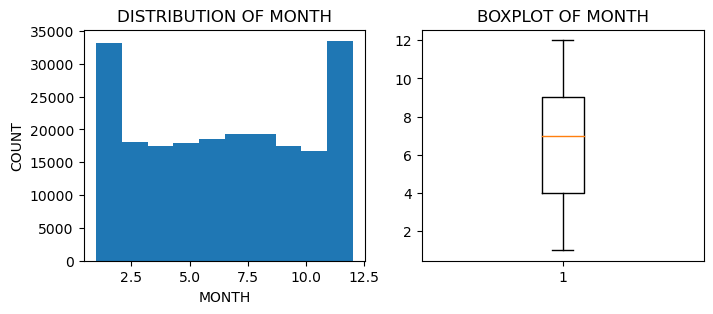

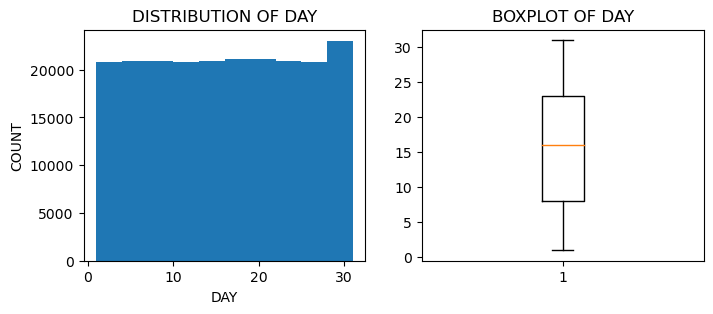

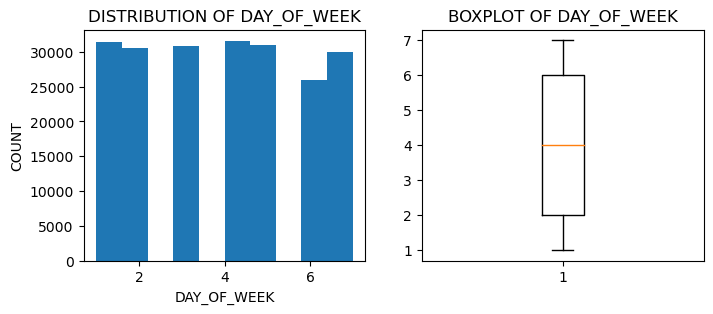

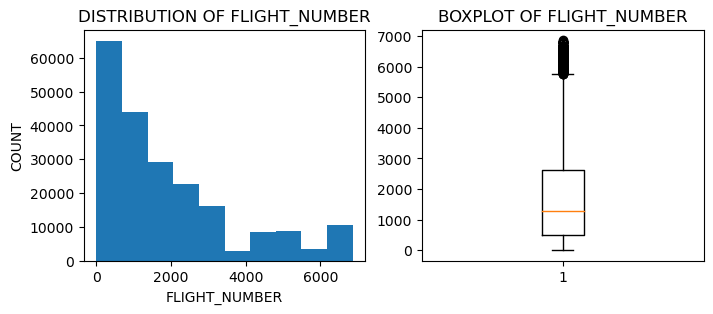

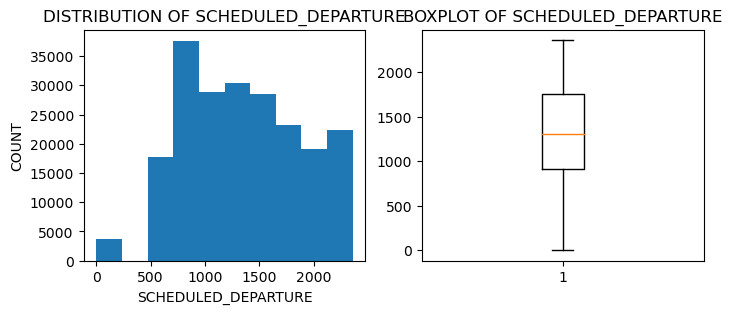

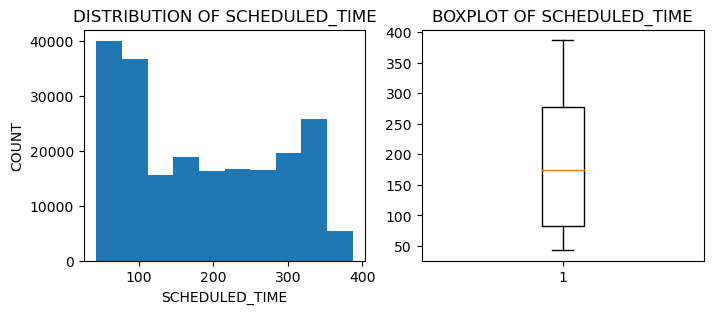

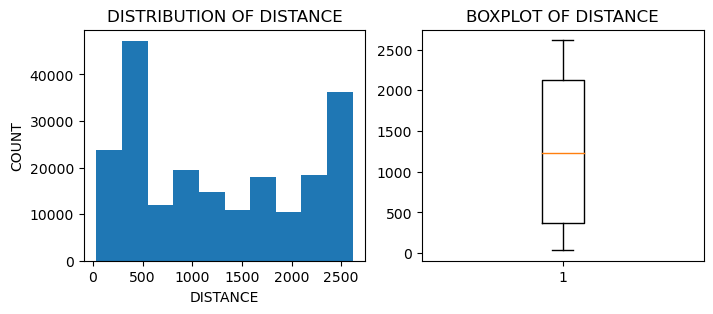

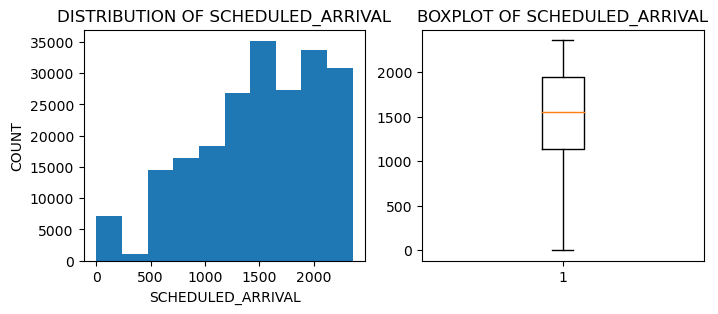

In [37]:
# Check out the distribution of all numeric features.

num_features = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL']
for feature in num_features:
    fig, axs = plt.subplots(ncols=2, figsize=(8,3))
    axs[0].hist(df[[feature]])
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel('COUNT')
    axs[0].set_title('DISTRIBUTION OF {}'.format(feature)) 
    axs[1].boxplot(df[feature])
    axs[1].set_title('BOXPLOT OF {}'.format(feature))
    plt.show()

Since none of these numeric features are normally distributed, we will use RobustScaler for FLIGHT_NUMBER which has a lot of outliers, and MinMaxScaler for the other numeric features as they don't have that many outliers.

In [38]:
num_features.remove('FLIGHT_NUMBER')
num_features_mm = [item + '_SCALED' for item in num_features]
num_features_mm

['MONTH_SCALED',
 'DAY_SCALED',
 'DAY_OF_WEEK_SCALED',
 'SCHEDULED_DEPARTURE_SCALED',
 'SCHEDULED_TIME_SCALED',
 'DISTANCE_SCALED',
 'SCHEDULED_ARRIVAL_SCALED']

In [39]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler_rb = RobustScaler()
scaler_mm = MinMaxScaler()

scaled_feature_rb = scaler_rb.fit_transform(df[['FLIGHT_NUMBER']])
scaled_feature_mm = scaler_mm.fit_transform(df[num_features])

df['FLIGHT_NUMBER_SCALED'] = scaled_feature_rb
df[num_features_mm] = scaled_feature_mm

df

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,...,DESTINATION_AIRPORT_ENCODED,DESTINATION_STATE_ENCODED,FLIGHT_NUMBER_SCALED,MONTH_SCALED,DAY_SCALED,DAY_OF_WEEK_SCALED,SCHEDULED_DEPARTURE_SCALED,SCHEDULED_TIME_SCALED,DISTANCE_SCALED,SCHEDULED_ARRIVAL_SCALED
0,1,1,4,2336,PBI,10,280.0,2330,750,0,...,0,10,0.495234,0.000000,0.000000,0.500000,0.003817,0.688953,0.889492,0.317642
1,1,1,4,258,MIA,20,285.0,2342,805,0,...,22,10,-0.495234,0.000000,0.000000,0.500000,0.008058,0.703488,0.894145,0.340967
2,1,1,4,2013,CLT,30,273.0,2125,803,0,...,28,6,0.341277,0.000000,0.000000,0.500000,0.012299,0.668605,0.810004,0.340119
3,1,1,4,1434,MSP,35,214.0,1535,609,0,...,26,12,0.065300,0.000000,0.000000,0.500000,0.014419,0.497093,0.581233,0.257846
4,1,1,4,115,MIA,105,286.0,2342,851,0,...,22,10,-0.563394,0.000000,0.000000,0.500000,0.044105,0.706395,0.894145,0.360475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211383,10,30,5,1508,LAS,1040,65.0,236,1145,0,...,40,19,0.100572,0.818182,0.966667,0.666667,0.440628,0.063953,0.077549,0.485157
211384,10,30,5,1754,ATL,1045,255.0,1947,1800,0,...,29,14,0.217827,0.818182,0.966667,0.666667,0.442748,0.616279,0.740985,0.762935
211385,10,30,5,1297,MIA,1045,301.0,2342,1846,0,...,22,10,0.000000,0.818182,0.966667,0.666667,0.442748,0.750000,0.894145,0.782443
211386,10,30,5,796,PHL,1045,320.0,2402,1905,0,...,51,24,-0.238799,0.818182,0.966667,0.666667,0.442748,0.805233,0.917410,0.807464


In [40]:
# Extract all labeled and scaled features and store them in a new dataframe called df_preprocessed.

df_preprocessed = df[['MONTH_SCALED', 'DAY_SCALED', 'DAY_OF_WEEK_SCALED', 'AIRLINE_ENCODED', 
                      'FLIGHT_NUMBER_SCALED', 'SCHEDULED_DEPARTURE_SCALED', 'SCHEDULED_TIME_SCALED', 
                      'DISTANCE_SCALED', 'SCHEDULED_ARRIVAL_SCALED', 'DESTINATION_AIRPORT_ENCODED',
                      'DESTINATION_STATE_ENCODED', 'CANCELLED']]
df_preprocessed

,MONTH_SCALED,DAY_SCALED,DAY_OF_WEEK_SCALED,AIRLINE_ENCODED,FLIGHT_NUMBER_SCALED,SCHEDULED_DEPARTURE_SCALED,SCHEDULED_TIME_SCALED,DISTANCE_SCALED,SCHEDULED_ARRIVAL_SCALED,DESTINATION_AIRPORT_ENCODED,DESTINATION_STATE_ENCODED,CANCELLED
0,0.000000,0.000000,0.500000,7,0.495234,0.003817,0.688953,0.889492,0.317642,0,10,0
1,0.000000,0.000000,0.500000,7,-0.495234,0.008058,0.703488,0.894145,0.340967,22,10,0
2,0.000000,0.000000,0.500000,5,0.341277,0.012299,0.668605,0.810004,0.340119,28,6,0
3,0.000000,0.000000,0.500000,0,0.065300,0.014419,0.497093,0.581233,0.257846,26,12,0
4,0.000000,0.000000,0.500000,7,-0.563394,0.044105,0.706395,0.894145,0.360475,22,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
211383,0.818182,0.966667,0.666667,11,0.100572,0.440628,0.063953,0.077549,0.485157,40,19,0
211384,0.818182,0.966667,0.666667,0,0.217827,0.442748,0.616279,0.740985,0.762935,29,14,0
211385,0.818182,0.966667,0.666667,7,0.000000,0.442748,0.750000,0.894145,0.782443,22,10,0
211386,0.818182,0.966667,0.666667,7,-0.238799,0.442748,0.805233,0.917410,0.807464,51,24,0


### 4.3 Training Data Development
#### 4.3.1 Splitting Data

Now that the data has been preprocessed, let's split the data into training and test sets, before we start the modeling work.

In [41]:
# Shuffle the data.

shuffled_df = df_preprocessed.sample(frac=1, random_state=123)

In [42]:
# Split data into training and test sets with a split of 80/20.

X = shuffled_df.drop(['CANCELLED'], axis=1)
y = shuffled_df[['CANCELLED']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [43]:
X_train, y_train

(        MONTH_SCALED  DAY_SCALED  DAY_OF_WEEK_SCALED  AIRLINE_ENCODED  \
 198781      0.818182    0.233333            0.500000                2   
 95060       0.454545    0.433333            1.000000               11   
 203555      0.818182    0.500000            0.666667                7   
 20812       0.090909    0.200000            0.833333                8   
 163362      0.909091    0.100000            0.333333                9   
 ...              ...         ...                 ...              ...   
 134935      0.636364    0.533333            0.000000               10   
 162944      0.909091    0.100000            0.333333                1   
 145452      0.727273    0.066667            0.500000               10   
 169551      0.909091    0.500000            0.000000                7   
 123998      0.545455    1.000000            0.666667                8   
 
         FLIGHT_NUMBER_SCALED  SCHEDULED_DEPARTURE_SCALED  \
 198781             -0.602479                    

In [44]:
X_test, y_test

(        MONTH_SCALED  DAY_SCALED  DAY_OF_WEEK_SCALED  AIRLINE_ENCODED  \
 110790      0.545455    0.300000            0.666667               11   
 65018       0.272727    0.766667            0.666667                7   
 17284       0.000000    1.000000            0.833333                8   
 204478      0.818182    0.566667            1.000000                0   
 84264       0.363636    0.900000            0.500000                8   
 ...              ...         ...                 ...              ...   
 69908       0.363636    0.066667            1.000000                8   
 135180      0.636364    0.566667            0.166667                7   
 17305       0.000000    1.000000            0.833333                6   
 57085       0.272727    0.333333            0.833333                4   
 163849      0.909091    0.133333            0.500000                7   
 
         FLIGHT_NUMBER_SCALED  SCHEDULED_DEPARTURE_SCALED  \
 110790             -0.341277                    

In [45]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_train.to_csv("y_train.csv")